# 6. Implement linear regression using python.




[link text](https://realpython.com/linear-regression-in-python/)

The following figure illustrates simple linear regression:
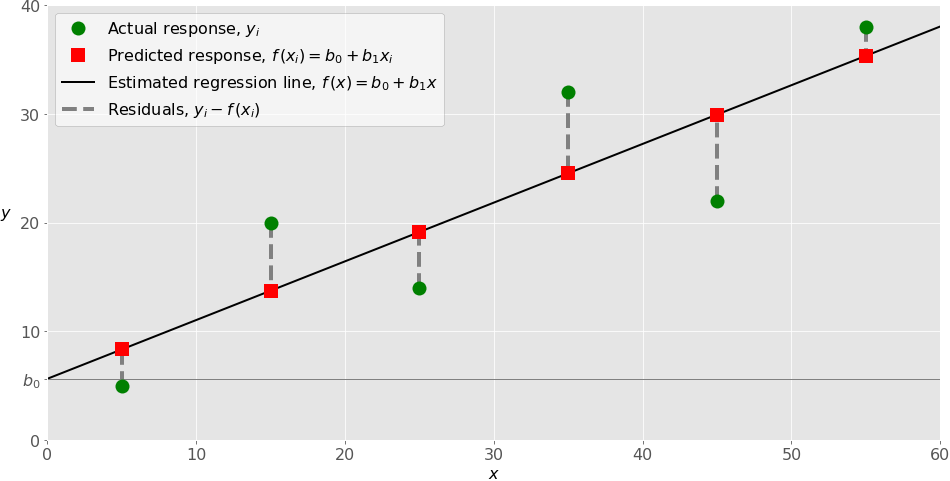

## Python Packages for Linear Regression
The package **NumPy** is a fundamental Python scientific package that allows many high-performance operations on single- and multi-dimensional arrays.

 It also offers many mathematical routines. Of course, it’s open source.

 The package **scikit-learn** is a widely used Python library for machine learning, built on top of NumPy and some other packages.
 
  It provides the means for preprocessing data, reducing dimensionality, implementing regression, classification, clustering, and more. 
  
  Like NumPy, scikit-learn is also open source.

## Simple Linear Regression With scikit-learn

Let’s start with the simplest case, which is simple linear regression.

There are five basic steps when you’re implementing linear regression:

1.Import the packages and classes you need.

2.Provide data to work with and eventually do appropriate transformations.


3.Create a regression model and fit it with existing data.


4.Check the results of model fitting to know whether the model is satisfactory.


5.Apply the model for predictions.


These steps are more or less general for most of the regression approaches and implementations.

# Step 1: Import packages and classes

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

Now, you have all the functionalities you need to implement linear regression.

The fundamental data type of NumPy is the array type called numpy.ndarray. 


The class sklearn.linear_model.LinearRegression will be used to perform linear  regression and make predictions accordingly.

# Step 2: Provide data

The second step is defining data to work with.

 The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. 
 
 This is the simplest way of providing data for regression:

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Now, you have two arrays: the input x and output y.

 You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary.
 
  That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [ ]:
#This is how x and y look now:
print(x)
print(y)


[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


As you can see, x has two dimensions, and x.shape is (6, 1), while y has a single dimension, and y.shape is (6,).

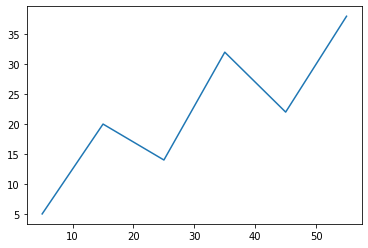

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

## Step 3: Create a model and fit it

The next step is to create a linear regression model and fit it using the existing data.

Let’s create an instance of the class LinearRegression, which will represent the regression model:

In [ ]:
model = LinearRegression()

This statement creates the variable model as the instance of LinearRegression.

 You can provide several optional parameters to LinearRegression:

 **fit_intercept** is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).


**normalize** is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).


**copy_X** is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).


**n_jobs** is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

 This example uses the default values of all parameters.

It’s time to start using the model. 

First, you need to call .fit() on model:

In [ ]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments.

 In other words, .fit() fits the model. It returns self, which is the variable model itself. 
 
 That’s why you can replace the last two statements with this one:

In [ ]:
model = LinearRegression().fit(x, y)
#This statement does the same thing as the previous two. It’s just shorter.

## Step 4: Get results

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (𝑅²) with .score() called on model:

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158756137479542


When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².

The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:

In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


The code above illustrates how to get 𝑏₀ and 𝑏₁.


 You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value 𝑏₀ = 5.63 (approximately) illustrates that your model predicts the response 5.63 when 𝑥 is zero.

 The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

You should notice that you can provide y as a two-dimensional array as well. In this case, you’ll get a similar result. This is how it might look:

In [ ]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


As you can see, this example is very similar to the previous one, but in this case, .intercept_ is a one-dimensional array with the single element 𝑏₀, and .coef_ is a two-dimensional array with the single element 𝑏₁.

# Step 5: Predict response

Once there is a satisfactory model, you can use it for predictions with either existing or new data.

To obtain the predicted response, use .predict():

In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


When applying .predict(), you pass the regressor as the argument and get the corresponding predicted response.

In [ ]:
# This is a nearly identical way to predict the response:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')
r_sq1 = model.score(x, y_pred)
print('coefficient of determination:', r_sq1)


predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]
coefficient of determination: 1.0


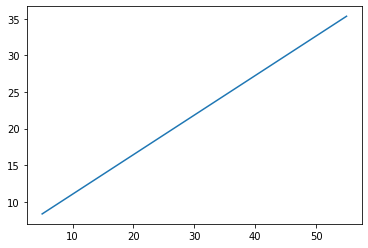

In [ ]:
plt.plot(x,y_pred)
plt.show()

In this case, you multiply each element of x with model.coef_ and add model.intercept_ to the product.

The output here differs from the previous example only in dimensions. 

The predicted response is now a two-dimensional array, while in the previous case, it had one dimension.

If you reduce the number of dimensions of x to one, these two approaches will yield the same result. 

You can do this by replacing x with x.reshape(-1), x.flatten(), or x.ravel() when multiplying it with model.coef_.

In [ ]:
#In practice, regression models are often applied for forecasts. 
#his means that you can use fitted models to calculate the outputs based on some other, new inputs:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)


[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


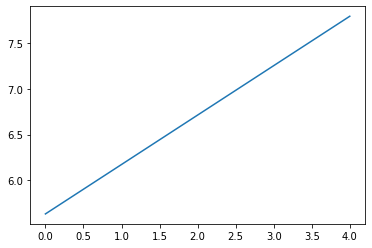

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_new,y_new)
plt.show()

Here .predict() is applied to the new regressor x_new and yields the response y_new.

 This example conveniently uses arange() from numpy to generate an array with the elements from 0 (inclusive) to 5 (exclusive), that is 0, 1, 2, 3, and 4.

[link text](https://realpython.com/linear-regression-in-python/#simple-linear-regression)